Student: Duncan Ferguson <br>
Student Id: 871641260 <br>
Class: Comp 4431-1 <br>
Assignment: Exercise 6 <br>
Date: 10/22/2021 <br>
Group: Name: Broken Toe <br>
Group Members: Emma Bright, Mike Santoro <br>

In [134]:
# Importing Libraries

import pandas as pd
import random
import numpy as np
import graphviz
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz

GPA's are assigned randomly inbetween a scale of 1 and 4

In [135]:
# Setting Random Seed
random.seed(16)

# Creating a list of 12 Random GPAS
GPA = [round(random.uniform(1, 4), 2) for _ in range(12)]  # Creating List of Random GPA
GPA_testing = [round(random.uniform(1, 4), 2) for _ in range(12)]
print("GPA's", GPA)
print("GPA's Testing", GPA_testing)

GPA's [2.08, 2.44, 2.25, 2.34, 2.23, 2.97, 1.78, 2.9, 1.03, 1.91, 2.01, 1.43]
GPA's Testing [3.23, 1.93, 3.37, 3.87, 1.76, 3.68, 3.42, 3.0, 1.08, 2.37, 2.88, 1.89]


Rankings are assigned on tier basis. Within those tiers there is some variability <br>
-If the GPA is above 3.5 the student is in the top 90-100% <br>
-If the GPA is above 3.0 but below 3.5 the student is in the top 80-90% <br>
-If the GPA is above 2.5 but below 3 the student is in the top 70-80% <br>
-If the GPA is above 2.0 but below 2.5 the student is in the top 60-70% <br>
-If the GPA is below 2.0 the student is in the bottom 0-60% <br>

In [136]:
def get_rankings(GPA):
    """This Function Randomizes rankings with weights"""
    RANK = []
    for grade in GPA:
        if grade > 3.5:
            RANK.append(round(random.uniform(.9, 1), 2))
        elif grade > 3:
            RANK.append(round(random.uniform(.8, .9), 2))
        elif grade > 2.5:
            RANK.append(round(random.uniform(.7, .8), 2))
        elif grade > 2:
            RANK.append(round(random.uniform(.6, .7), 2))
        else:
            RANK.append(round(random.uniform(0, .6), 2))
    return RANK

RANK = get_rankings(GPA)
RANK_testing = get_rankings(GPA_testing)

print("Rankings", RANK)
print("Ranking Testing", RANK_testing)

Rankings [0.62, 0.63, 0.63, 0.68, 0.63, 0.74, 0.39, 0.79, 0.18, 0.03, 0.7, 0.5]
Ranking Testing [0.88, 0.31, 0.82, 0.92, 0.18, 0.95, 0.81, 0.77, 0.44, 0.6, 0.78, 0.29]


For assigning working values. 1 indicates that the student did work, 0 indicates the student did not. <br>
-If the students GPA is above 2.0, there is a random 0-60 value assigned. If that value is above 50 they did work. <br>
-If the students GPA is below 2.0, there is a random 30-100 value assigned. If that value is above 50 they did work.

In [137]:
# Setting up Random Work 0 did not work 1 did, Scaling it toward working have lower GPA
def get_working(GPA):
    """Determining if they worked based off of GPA, with some randomness"""
    WORKED = []
    for num in enumerate(GPA):
        if num[1] > 2:
            rand_work = random.randint(0, 60)
            if rand_work > 50:
                WORKED.append(1)
            else:
                WORKED.append(0)
        else:
            if random.randint(30, 100) > 50:
                WORKED.append(1)
            else:
                WORKED.append(0)
    return  WORKED

WORKED = get_working(GPA)
WORKED_testing = get_working(GPA_testing)
print("Worked", WORKED)
print("Worked Testing", WORKED_testing)

Worked [1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]
Worked Testing [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]


Compressing the GPA, RANKING and WORKED into a list

In [138]:
def compress_list(GPA, RANK, WORKED):
    """Compressing the lists"""
    list_o_list = []
    for num in range(len(GPA)):
        list_o_list.append([GPA[num], RANK[num], WORKED[num]])
    return list_o_list

list_o_list = compress_list(GPA, RANK, WORKED)
list_o_training = compress_list(GPA_testing, RANK_testing, WORKED_testing)
print("List_o_list", list_o_list)
print("List_o_training", list_o_training)

List_o_list [[2.08, 0.62, 1], [2.44, 0.63, 1], [2.25, 0.63, 0], [2.34, 0.68, 0], [2.23, 0.63, 0], [2.97, 0.74, 0], [1.78, 0.39, 1], [2.9, 0.79, 1], [1.03, 0.18, 0], [1.91, 0.03, 1], [2.01, 0.7, 0], [1.43, 0.5, 0]]
List_o_training [[3.23, 0.88, 0], [1.93, 0.31, 1], [3.37, 0.82, 1], [3.87, 0.92, 0], [1.76, 0.18, 1], [3.68, 0.95, 0], [3.42, 0.81, 0], [3.0, 0.77, 0], [1.08, 0.44, 1], [2.37, 0.6, 0], [2.88, 0.78, 0], [1.89, 0.29, 1]]


Graduating in 6 years is based on the sum of GPA, RANK and WORKED. <br>
If the sum of these three variables is above 3, They graduate with in 6 years <br>
Graduate Training is made so that we can see how well our decision tree works

In [139]:
def grad_in_6(list_o_list):
    """Creating a classifier if they graduate in 6 years """
    graduate = []
    for person in enumerate(list_o_list):
        if sum(person[1]) > 3:
            graduate.append(1)
        else:
            graduate.append(0)
    return graduate

graduate = grad_in_6(list_o_list)
graduate_training = grad_in_6(list_o_training)

print('Graduate', graduate)
print('Graduate Training', graduate_training)

Graduate [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
Graduate Training [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1]


First Example

In [140]:
X = list_o_list
Y = graduate
labels = ["GPA", "RANK", "WORKED"]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
print(type(clf))
print(clf)

foo = clf.predict_proba(list_o_training)

print("output of classifying 4 new items (should be): ", graduate_training)
foo = pd.DataFrame(data=foo, columns=["Something","Graduate"])
predict_graduating = foo["Graduate"].to_list()
predict_graduating = [int(i) for i in predict_graduating]
print(predict_graduating)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier()
output of classifying 4 new items (should be):  [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]


Second Example


In [141]:
Xnum = list_o_list
classifications = graduate
clf2 = tree.DecisionTreeClassifier(criterion="entropy")
clf2 = clf2.fit(Xnum,classifications)
print(type(clf2))
print(clf2)

print("\nNow 'predicting class' of the first 6 elements of the training data.")
testData = list_o_training
foo = clf2.predict_proba( testData )
print("test data = " + str(testData))
print("data are classified as:")
print(foo)

treeStruct = export_text(clf2)
print("\nNow printing export_text(clf2)")
print(treeStruct)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(criterion='entropy')

Now 'predicting class' of the first 6 elements of the training data.
test data = [[3.23, 0.88, 0], [1.93, 0.31, 1], [3.37, 0.82, 1], [3.87, 0.92, 0], [1.76, 0.18, 1], [3.68, 0.95, 0], [3.42, 0.81, 0], [3.0, 0.77, 0], [1.08, 0.44, 1], [2.37, 0.6, 0], [2.88, 0.78, 0], [1.89, 0.29, 1]]
data are classified as:
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]

Now printing export_text(clf2)
|--- feature_0 <= 2.29
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.21
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.21
|   |   |   |--- class: 1
|--- feature_0 >  2.29
|   |--- class: 1



clf2.apply( Xnum ):
[5 6 2 6 2 6 5 6 2 4 2 2]

Now printing each tuple with the decision tree node it ends up in:
[2.08, 0.62, 1],5
[2.44, 0.63, 1],6
[2.25, 0.63, 0],2
[2.34, 0.68, 0],6
[2.23, 0.63, 0],2
[2.97, 0.74, 0],6
[1.78, 0.39, 1],5
[2.9, 0.79, 1],6
[1.03, 0.18, 0],2
[1.91, 0.03, 1],4
[2.01, 0.7, 0],2
[1.43, 0.5, 0],2


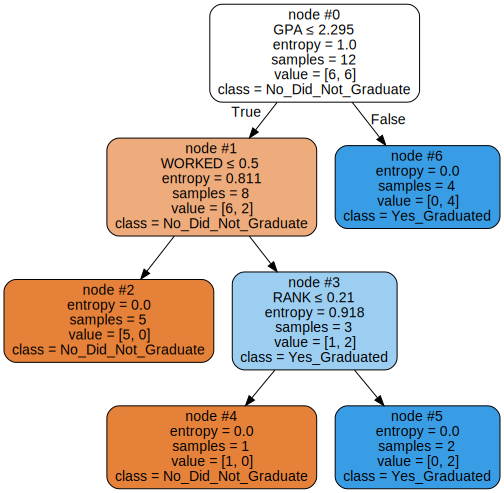

In [144]:
foo = clf2.apply( Xnum )   # passing in full list of training tuples
print("clf2.apply( Xnum ):")
print(foo)
# now print out line by line as pair:  tuple, which leaf node
print("\nNow printing each tuple with the decision tree node it ends up in:")
for i in range(len(foo)):
    print(str(Xnum[i]) + "," + str(foo[i]))

# NOTE - adding in node_ids and class_names as options to make tree viz more robust
dot_data = tree.export_graphviz(clf2, node_ids="true",
                                feature_names=labels,
                                class_names=('No_Did_Not_Graduate','Yes_Graduated'),
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

graph

Example 3 Creating a tree with "gini" instead of entropy

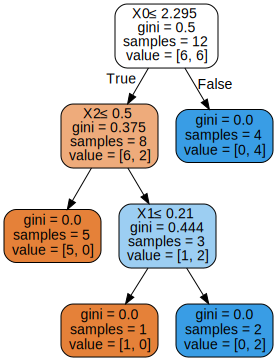

In [143]:
clf3 = tree.DecisionTreeClassifier(criterion="gini")
clf3 = clf3.fit(Xnum,classifications)
dotData3 = tree.export_graphviz(clf3, out_file=None, filled=True, rounded=True, special_characters=True)
foo = clf3.predict_proba( Xnum )

graph = graphviz.Source(dotData3)
graph





